<h1><b><font color = black><a id='division_ID0'>2001 - 2010 INDIA POLICE HOUSING STATISTICS</a></font></b></h1><br>
<b>Built by Arijit Roy, Arkadeep Roy, Soumodip Ghosh, Ankita Datta, Shayani Das</b>
<br><b>Guidance - Indranil Das, Technical Analyst, Webskitters Academy</b>
<br><b>In Association with Webskitters Academy</b>
<br><b>Hooghly Engineering & Technology College</b>

<p><b>Download Dataset Dependency - <a href = "https://drive.google.com/drive/folders/178cPQpM635fN_dwG8XByLwA6gpLu6IaW?usp=sharing">Click here</a></b></p>

<h3><b>Contents</b></h3>

[Data Collection](#division_ID1) | [Data Preprocessing](#division_ID2) | [Data Visualization](#division_ID3)

<h2><a id='division_ID1'>Data Collection</a></h2>

[MENU](#division_ID0)

In [13]:
# import dataset from local repository
import pandas as pd
df = pd.read_csv(r"E:\project-gtp-main\Dataset\police_housing_cleaned.csv")
df

,Area_Name,Year,Group_Name,Sub_Group_Name,PH_Houses_Provided_by_Department,PH_Houses_provided_on_LeaseRentGPRA,PH_Sanctioned_Strength
0,Andaman & Nicobar Islands,2001.0,PH_Officers (DySP & Above),1. For Officers (Dy.SP & Above),7,NaN,17.0
1,Andhra Pradesh,2001.0,PH_Officers (DySP & Above),1. For Officers (Dy.SP & Above),102,189,569.0
2,Arunachal Pradesh,2001.0,PH_Officers (DySP & Above),1. For Officers (Dy.SP & Above),81,11,92.0
3,Assam,2001.0,PH_Officers (DySP & Above),1. For Officers (Dy.SP & Above),0,0,531.0
4,Bihar,2001.0,PH_Officers (DySP & Above),1. For Officers (Dy.SP & Above),130,89,222.0
...,...,...,...,...,...,...,...
1040,Tripura,2010.0,PH_Lower Subordinates (Constables,Head Constables etc.),3. Lower SubOrdinates (Constables,Head Constables & Class-IV Subordinate Staff),1942.0
1041,Uttar Pradesh,2010.0,PH_Lower Subordinates (Constables,Head Constables etc.),3. Lower SubOrdinates (Constables,Head Constables & Class-IV Subordinate Staff),29348.0
1042,Uttarakhand,2010.0,PH_Lower Subordinates (Constables,Head Constables etc.),3. Lower SubOrdinates (Constables,Head Constables & Class-IV Subordinate Staff),4267.0
1043,West Bengal,2010.0,PH_Lower Subordinates (Constables,Head Constables etc.),3. Lower SubOrdinates (Constables,Head Constables & Class-IV Subordinate Staff),14793.0


<h2><a id='division_ID2'>Data Preprocessing</a></h2>

[MENU](#division_ID0)

In [14]:
# check null values in the dataset
df.isnull().sum()

Area_Name                                1
Year                                     1
Group_Name                               1
Sub_Group_Name                           1
PH_Houses_Provided_by_Department        28
PH_Houses_provided_on_LeaseRentGPRA    205
PH_Sanctioned_Strength                   9
dtype: int64

In [15]:
# fill the null values with 0
df.fillna(0, inplace = True)

In [16]:
# drop unneccesary columns
df.drop(['Group_Name', 'Sub_Group_Name'], axis = 1, inplace = True)

<h2><a id='division_ID3'>Data Visualization</a></h2>

[MENU](#division_ID0)

- <h3><b>2001 - 2010 Total Statewise Police Housing</b></h3>

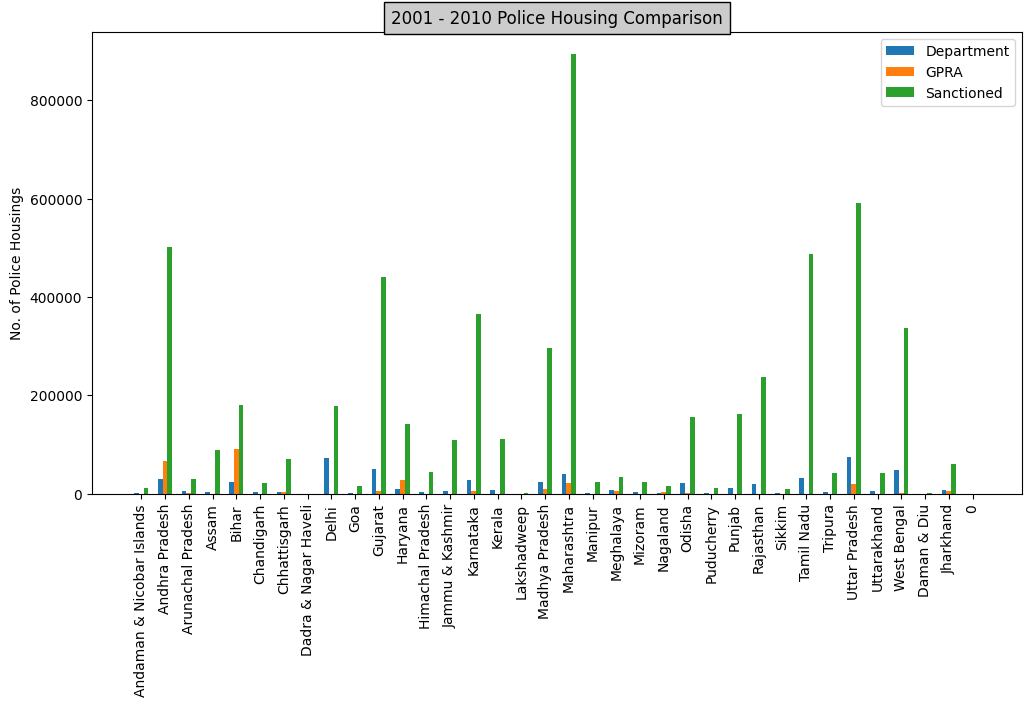

In [21]:
import matplotlib.pyplot as plt
import numpy as np
# Extract unique area names
areas = df.iloc[:, 0].unique()
# Convert last three columns to numeric (force errors to NaN and fill them with 0)
df.iloc[:, -3:] = df.iloc[:, -3:].apply(pd.to_numeric, errors='coerce').fillna(0)
# Compute sums for each area
housing_data = [df[df.iloc[:, 0] == i].iloc[:, -3:].sum().values for i in areas]
r = np.arange(len(areas))
w = 0.2
plt.figure(figsize=(12, 6))
for i in range(3):
    plt.bar(r + i * w, [h[i] for h in housing_data], width=w)
plt.xticks(r + w, areas, rotation=90)
plt.title('2001 - 2010 Police Housing Comparison', bbox={'facecolor': '0.8', 'pad': 5})
plt.ylabel('No. of Police Housings')
plt.legend(['Department', 'GPRA', 'Sanctioned'])
plt.show()

- <h3><b>2001 - 2010 Yearwise Police Housing</b></h3>

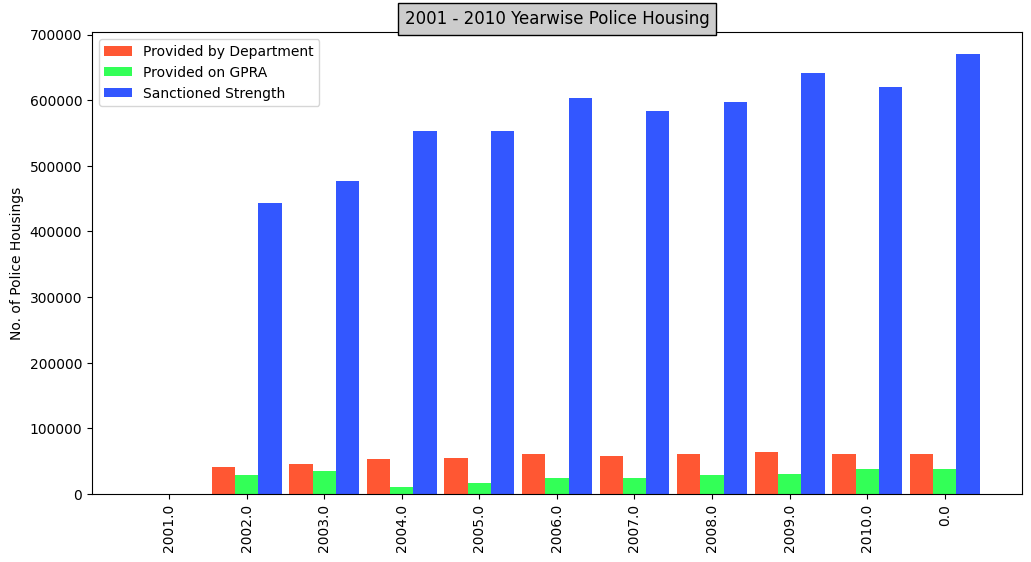

In [22]:
import matplotlib.pyplot as plt
import numpy as np
# Ensure last three columns are numeric to prevent TypeErrors
df.iloc[:, -3:] = df.iloc[:, -3:].apply(pd.to_numeric, errors='coerce').fillna(0)
# Extract unique years and sum values
timeline = df.iloc[:, 1].unique()
housing_data = df.groupby(df.iloc[:, 1]).sum().iloc[:, -3:].values.T  # Transposed for plotting
r = np.arange(len(timeline))
w = 0.3
plt.figure(figsize=(12, 6))
labels = ['Provided by Department', 'Provided on GPRA', 'Sanctioned Strength']
colors = ['#FF5733', '#33FF57', '#3357FF']
for i in range(3):
    plt.bar(r + i * w, housing_data[i], width=w, label=labels[i], color=colors[i])
plt.xticks(r + w, timeline, rotation=90)
plt.ylabel('No. of Police Housings')
plt.title('2001 - 2010 Yearwise Police Housing', bbox={'facecolor': '0.8', 'pad': 5})
plt.legend()
plt.show()

- <h3><b>2001 - 2010 Statewise & Yearwise Police Housing</b></h3>

In [23]:
import matplotlib.pyplot as plt
import numpy as np
def plot_details(state_name):
    # Filter dataset for the given state
    new = df[df.iloc[:, 0] == state_name]
    # Convert last three columns to numeric (if not already)
    new.iloc[:, -3:] = new.iloc[:, -3:].apply(pd.to_numeric, errors='coerce').fillna(0)
    # Aggregate sum for each year
    housing_data = new.groupby(new.iloc[:, 1]).sum().iloc[:, -3:].values.T
    r = np.arange(len(new.iloc[:, 1].unique()))
    w = 0.25
    colors = ['#FF5733', '#33FF57', '#3357FF']
    labels = ['Provided by Department', 'Provided on GPRA', 'Sanctioned Strength']
    plt.figure(figsize=(10, 5))  # Reduced figure size
    for i in range(3):
        plt.bar(r + i * w, housing_data[i], width=w, label=labels[i], color=colors[i])
    plt.xticks(r + w, new.iloc[:, 1].unique(), rotation=45)
    plt.ylabel('No. of Police Housings')
    plt.title(f'{state_name} Police Housing (2001-2010)', fontsize=12)
    plt.legend(fontsize=8)
    plt.tight_layout()
    plt.show()

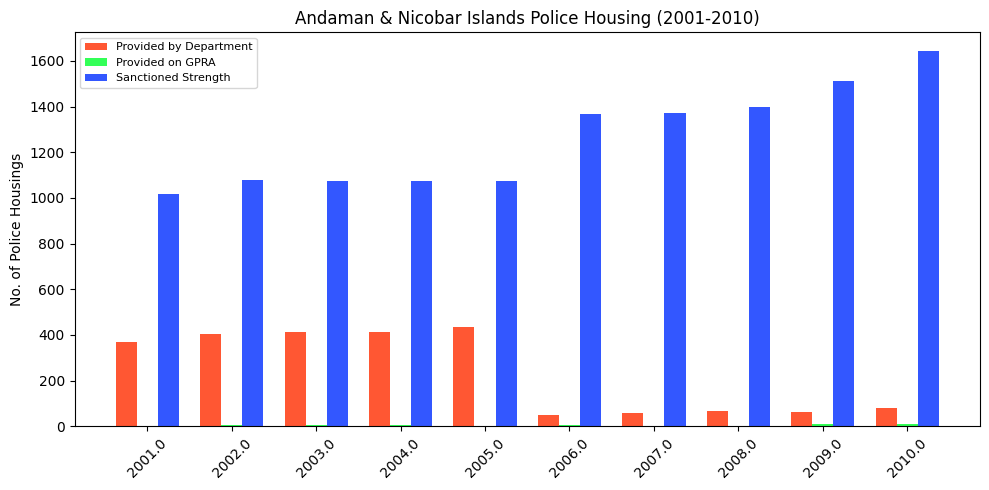

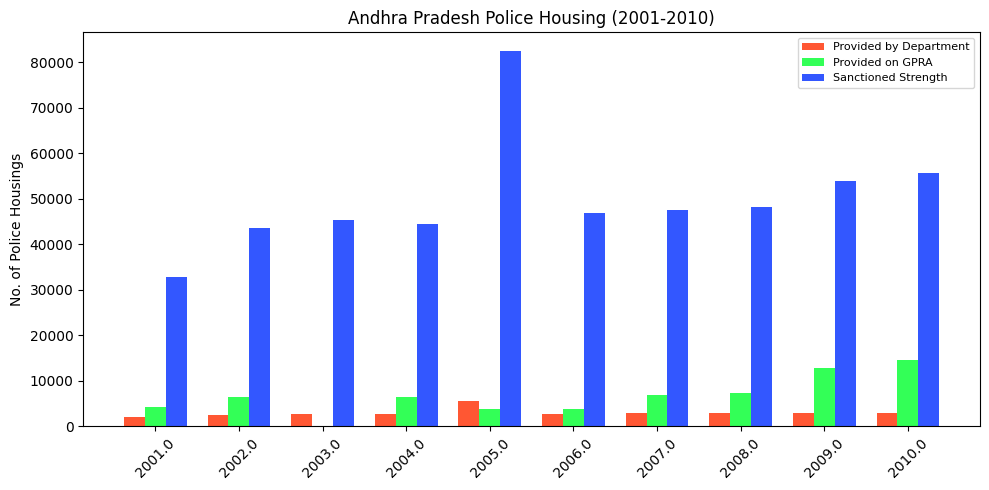

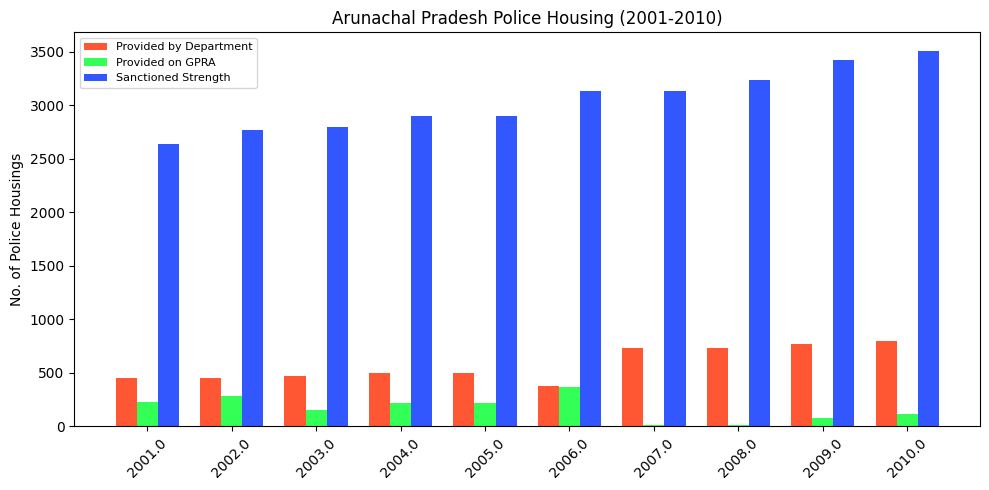

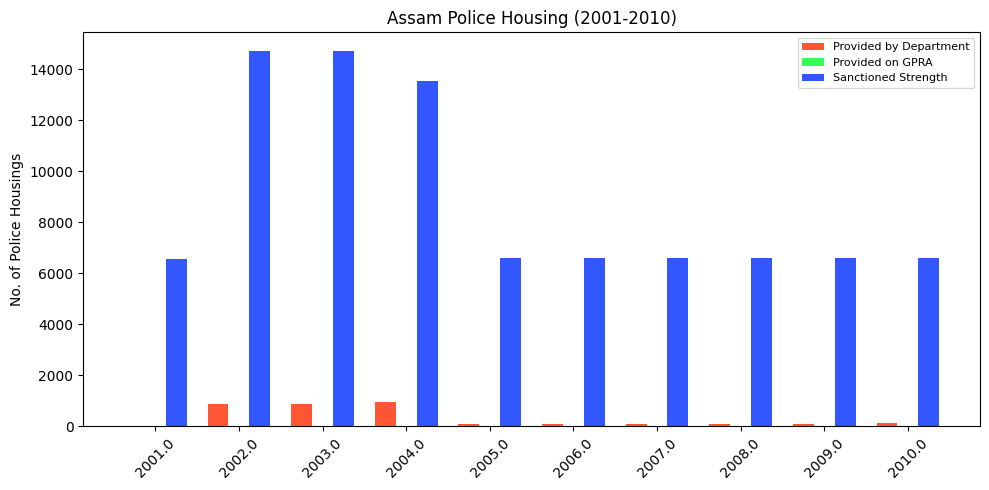

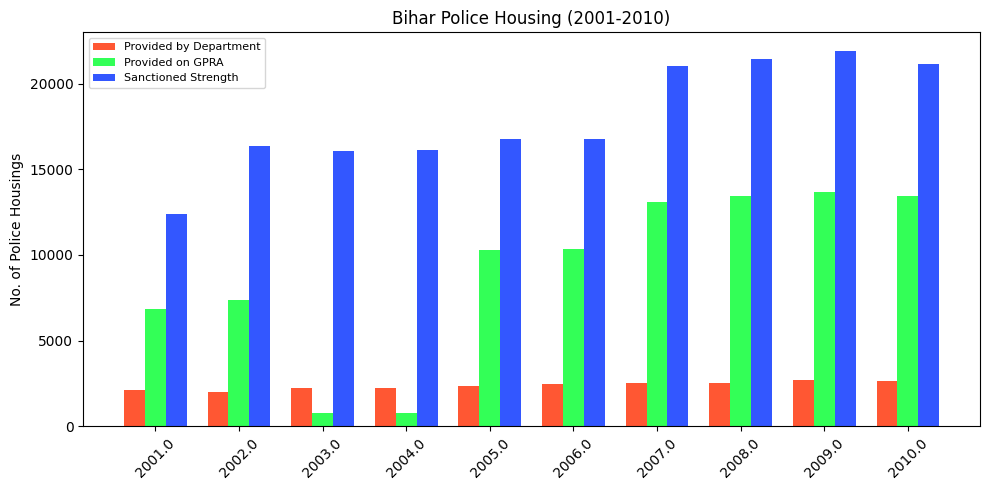

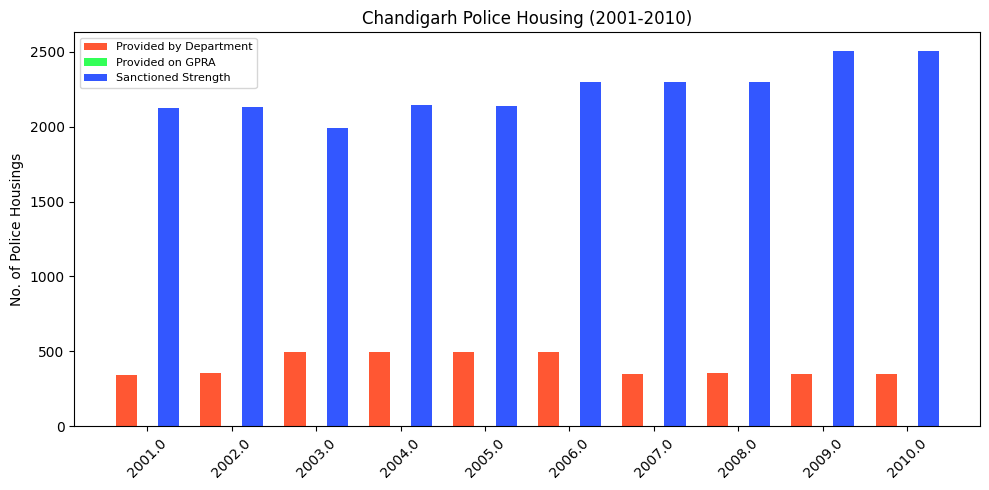

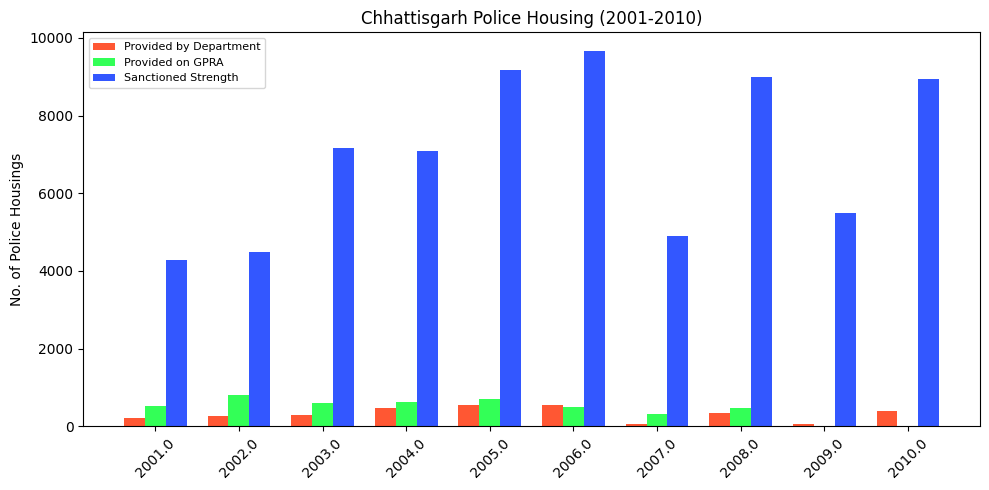

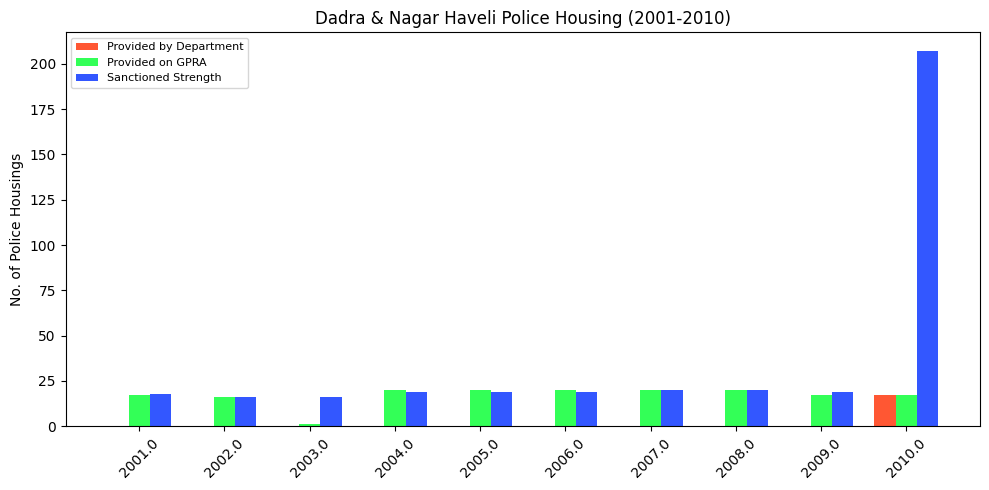

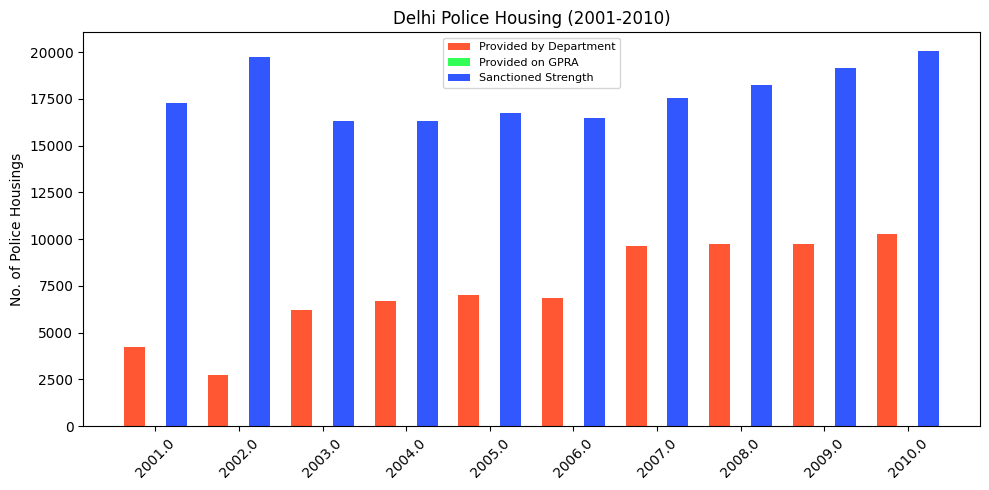

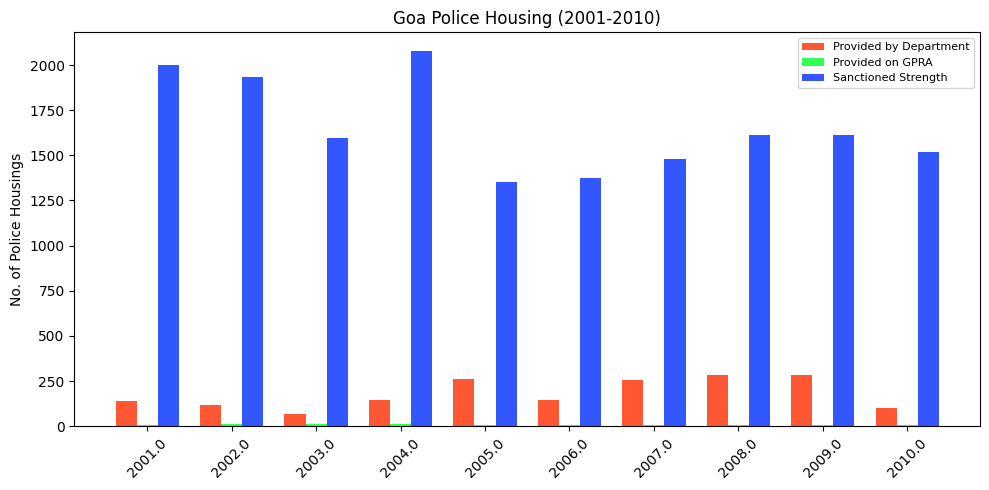

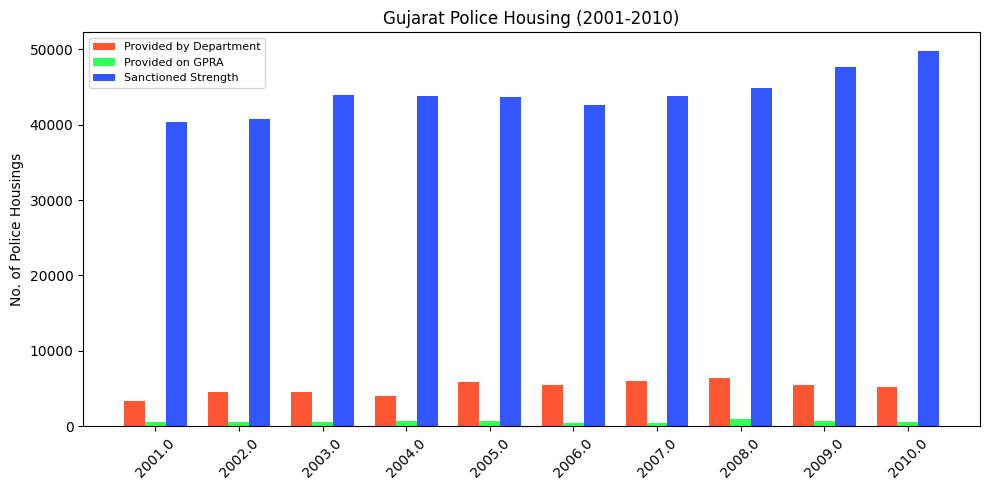

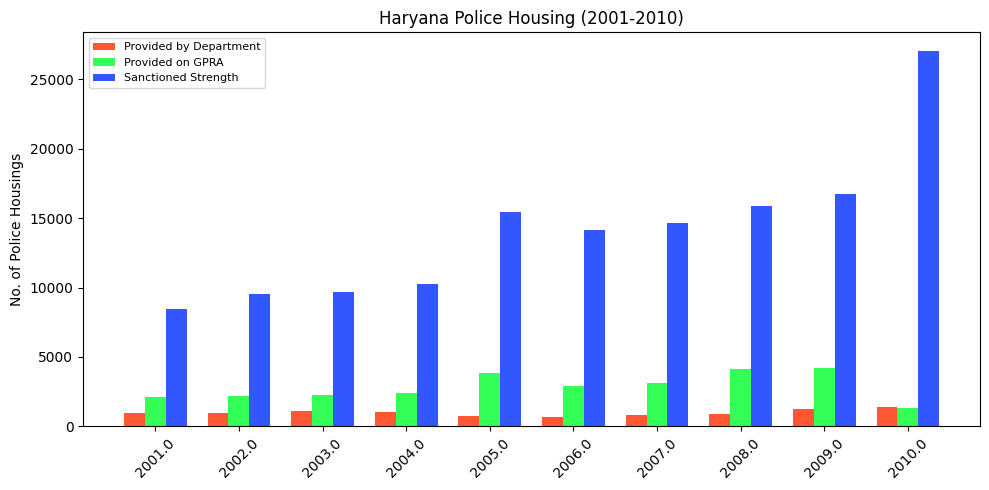

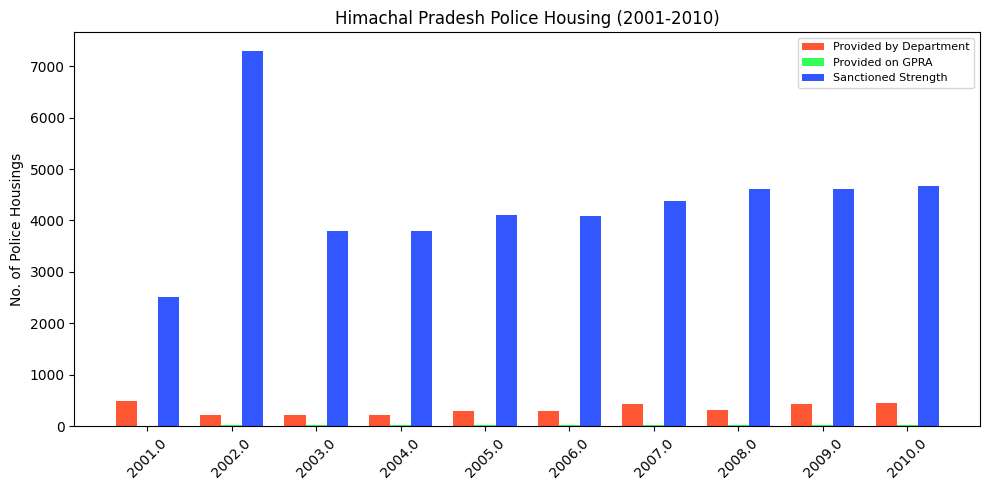

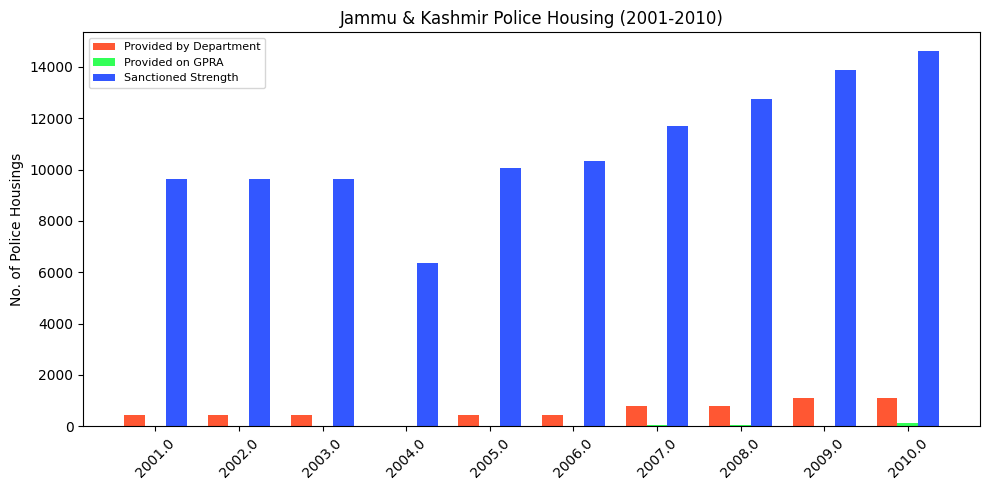

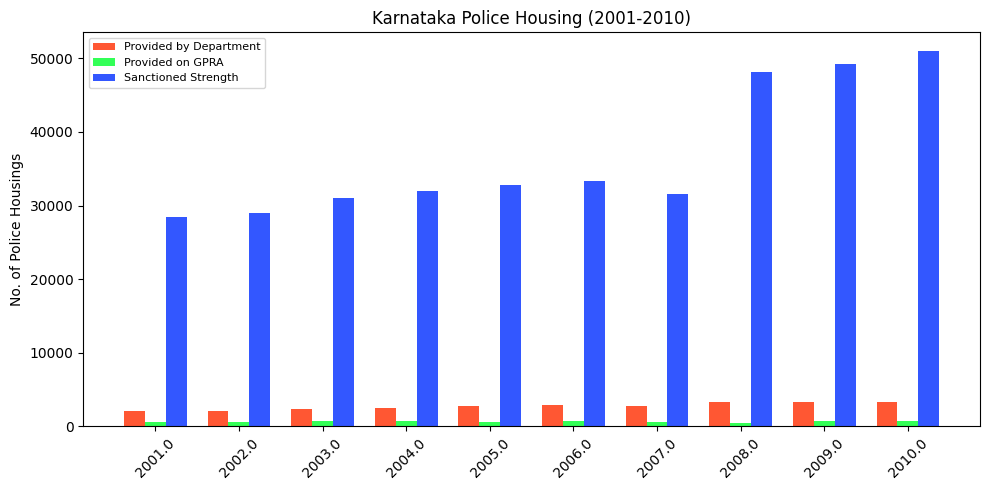

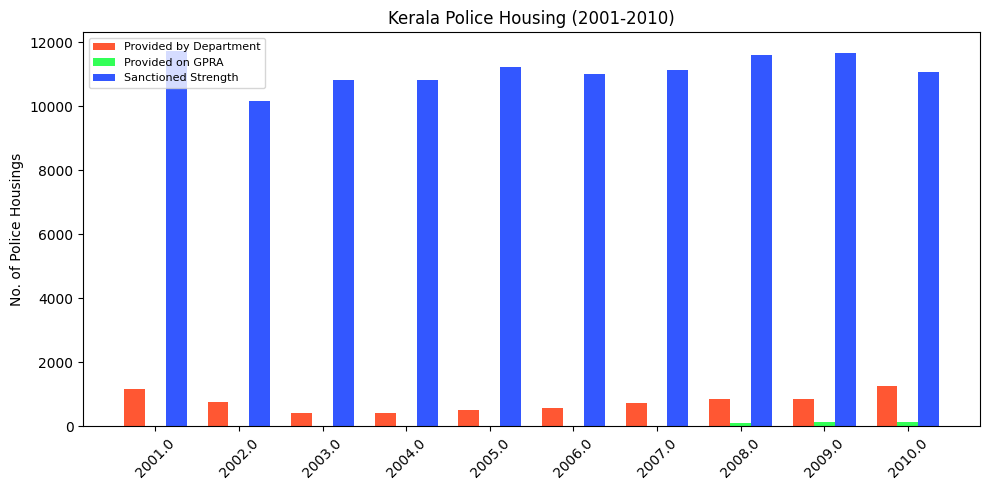

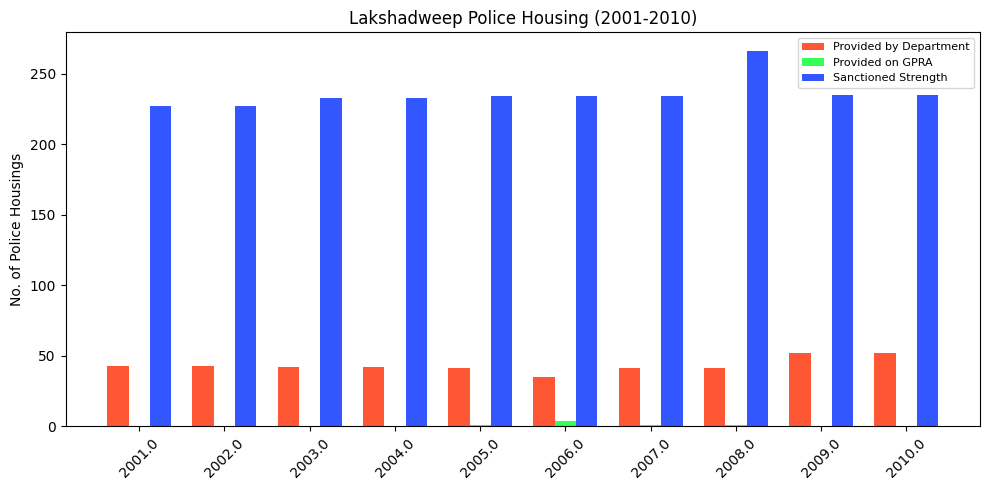

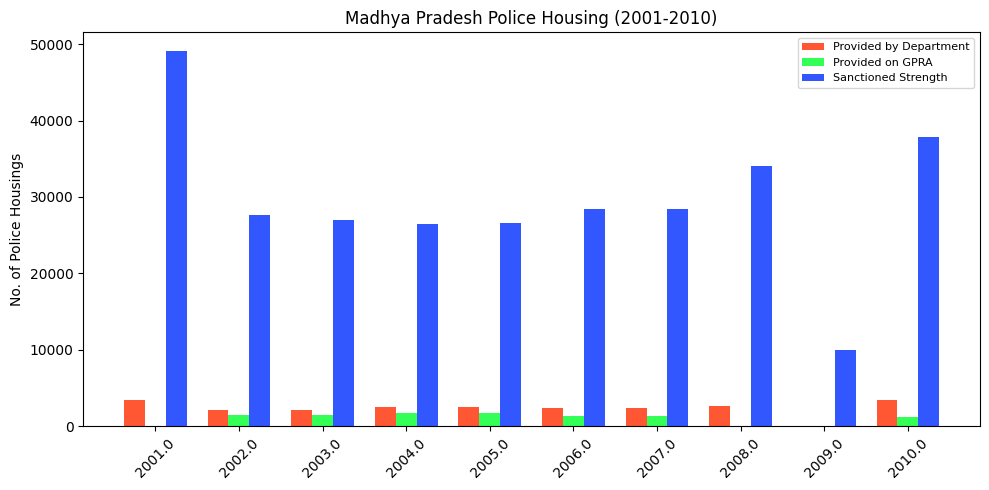

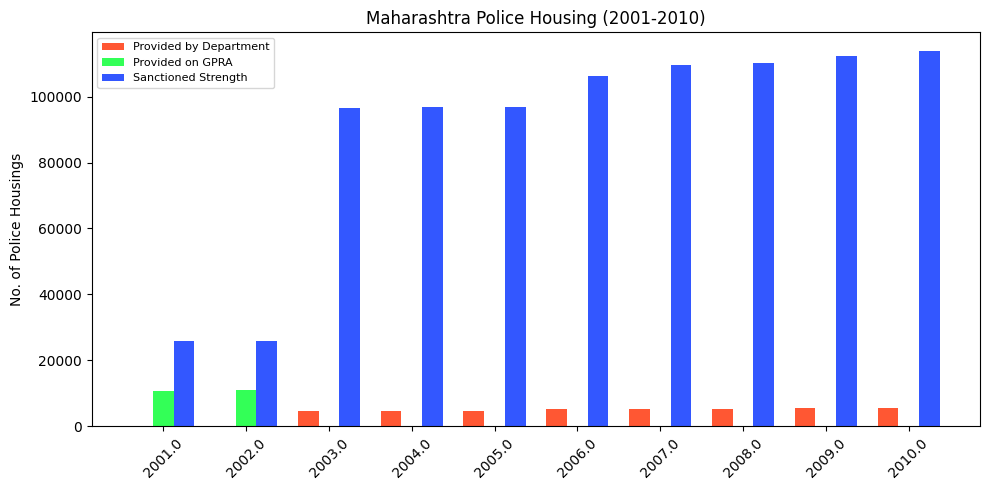

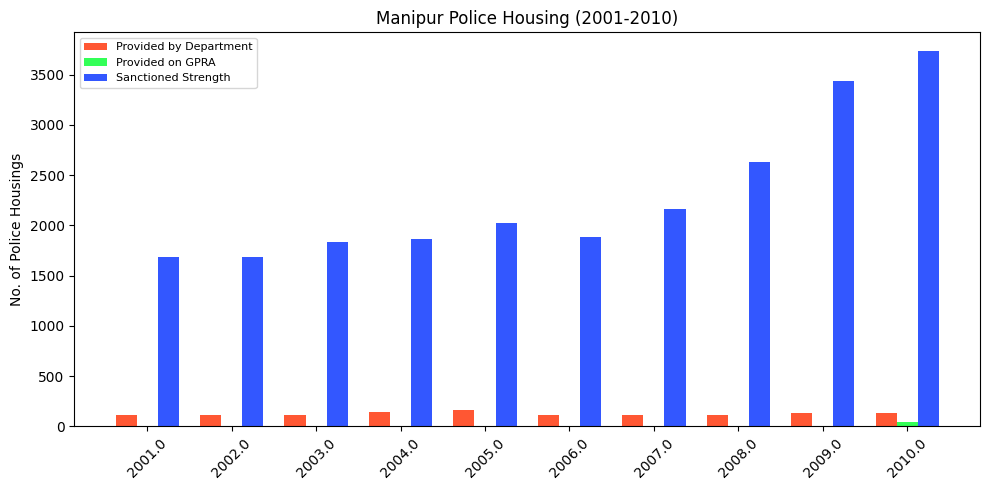

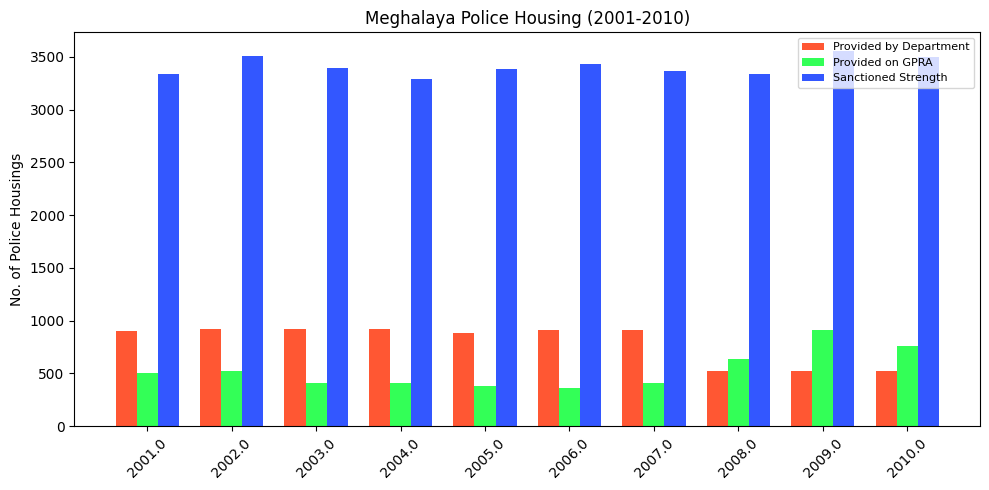

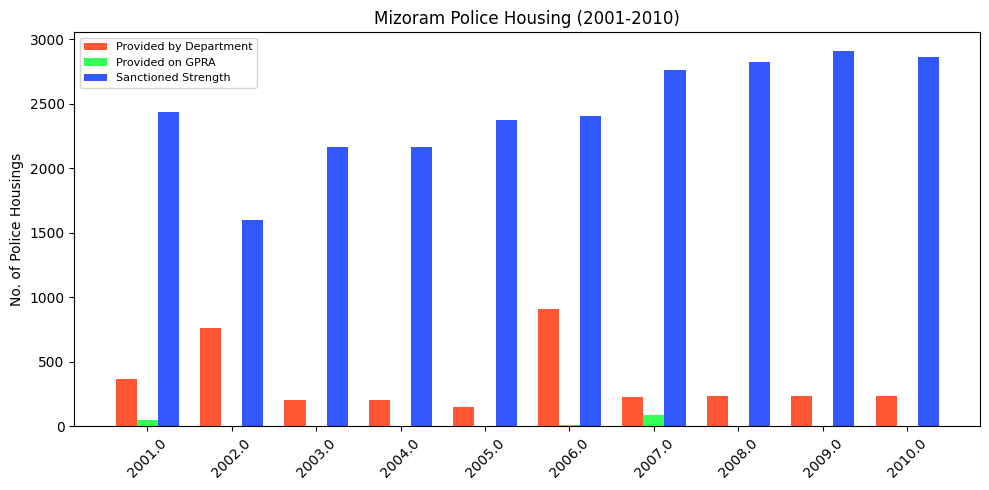

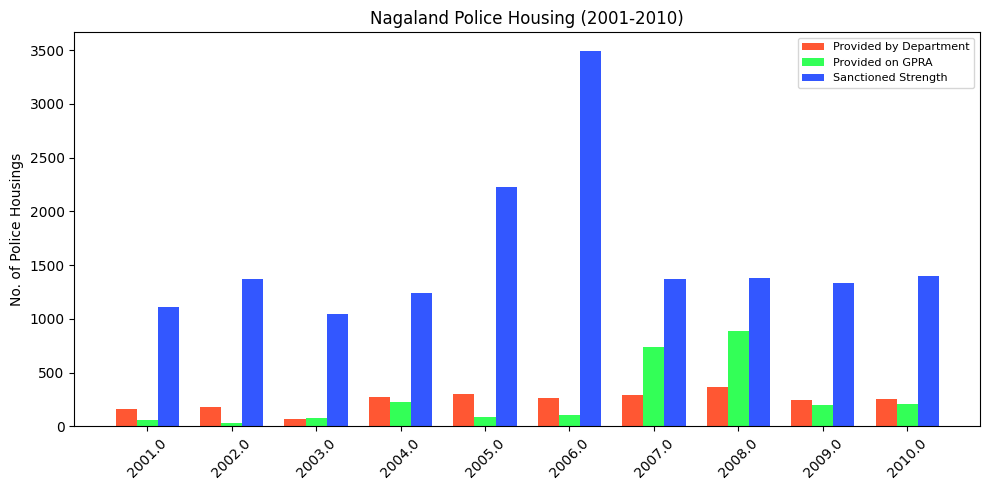

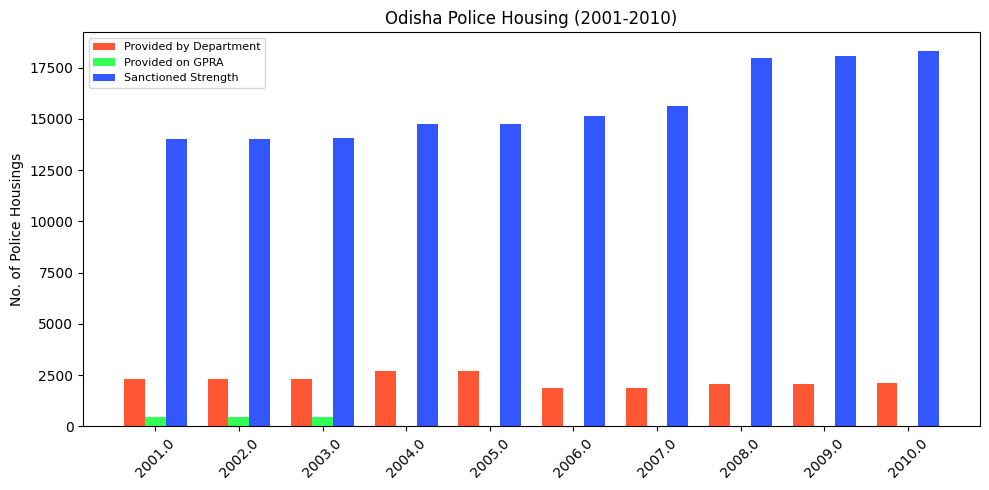

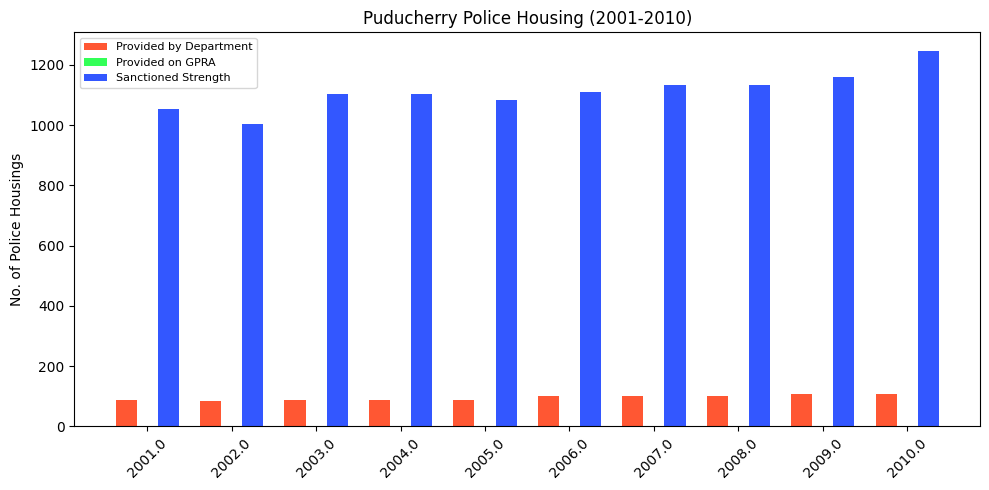

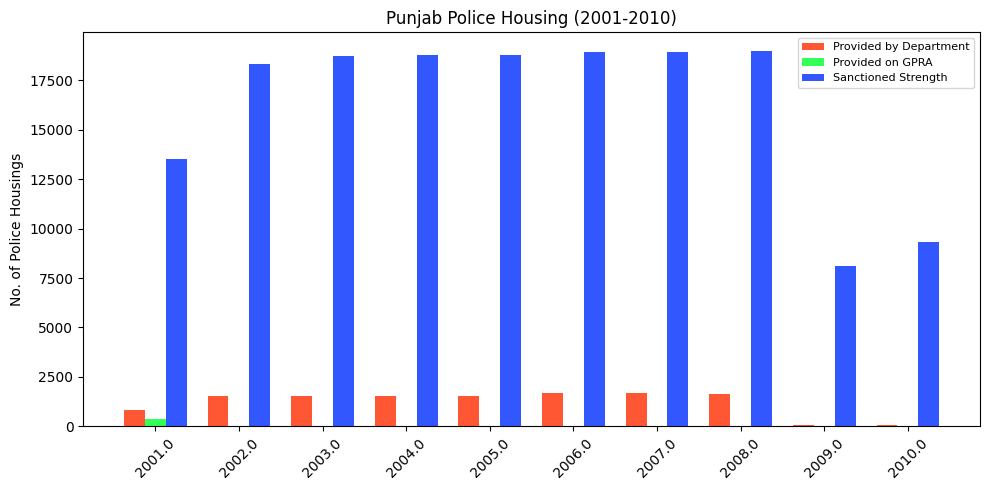

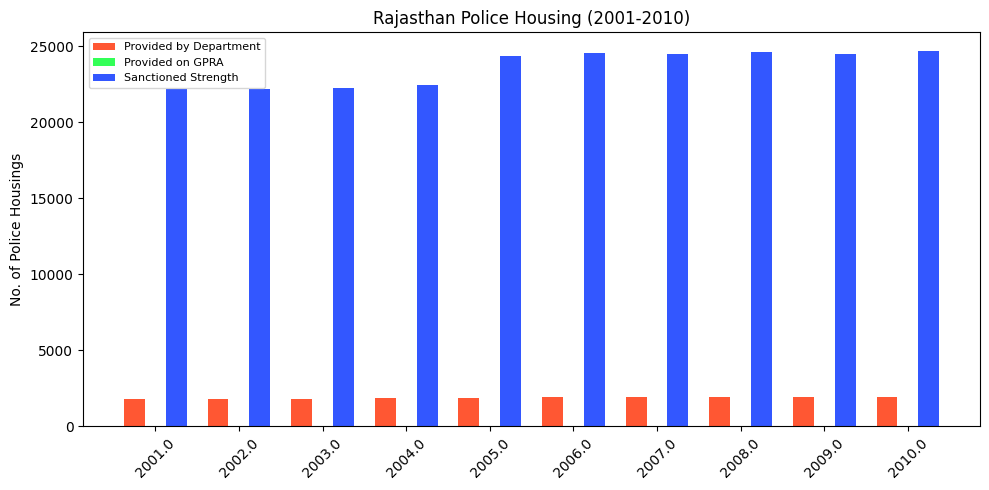

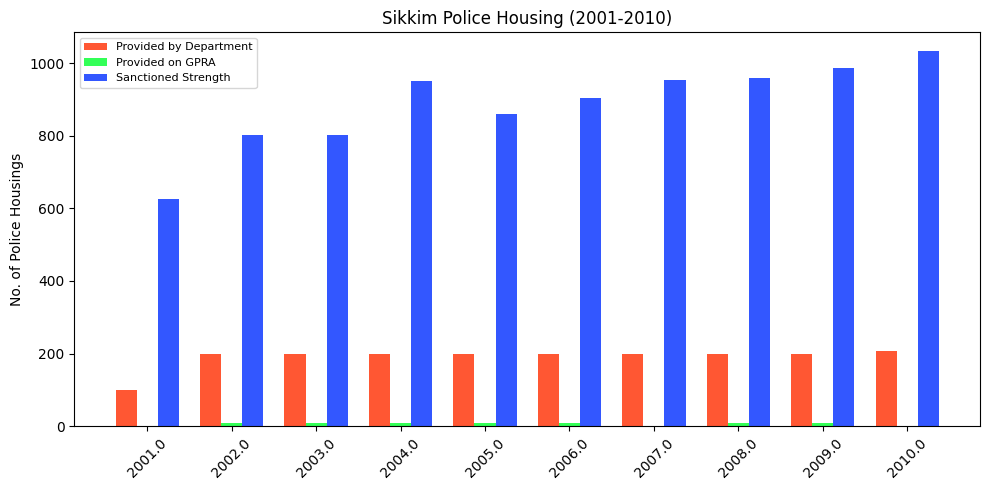

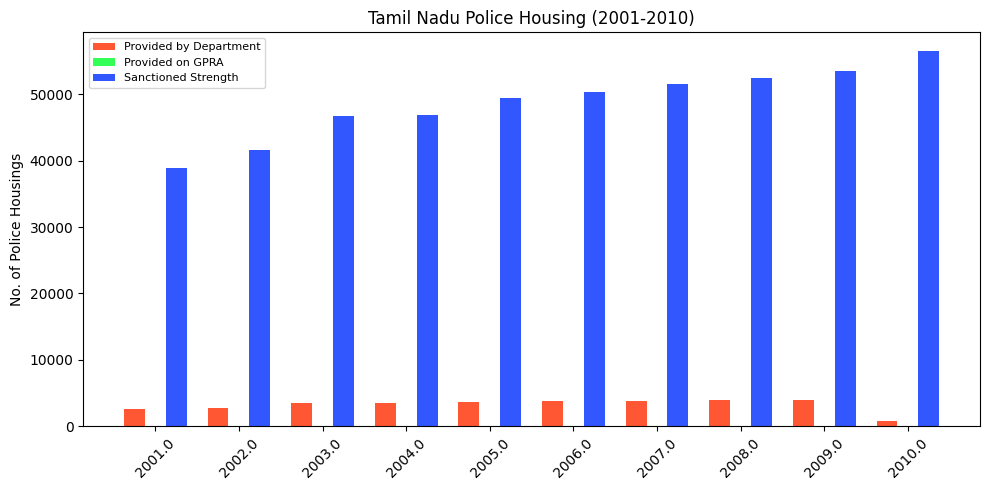

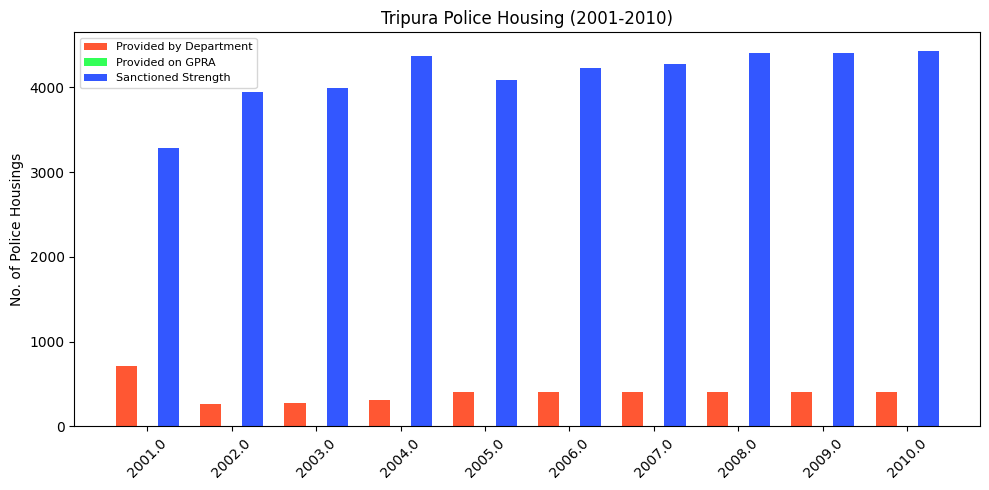

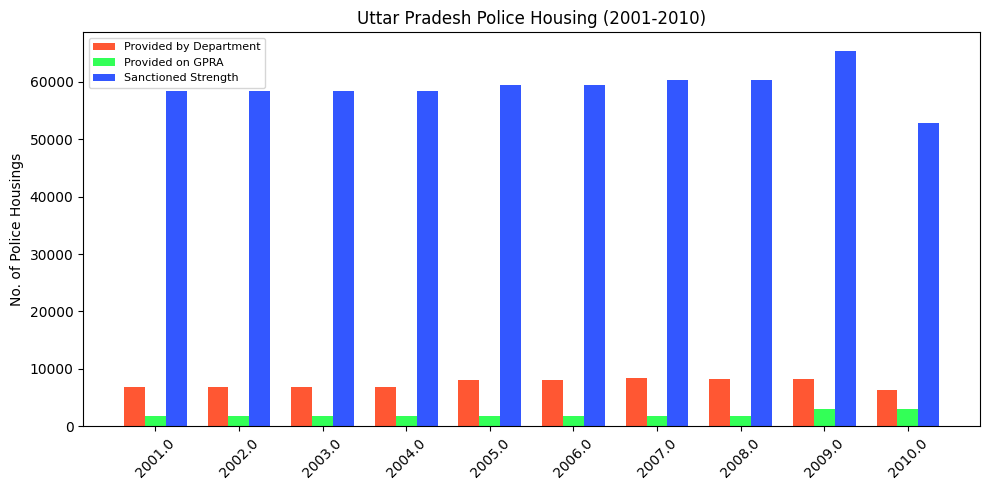

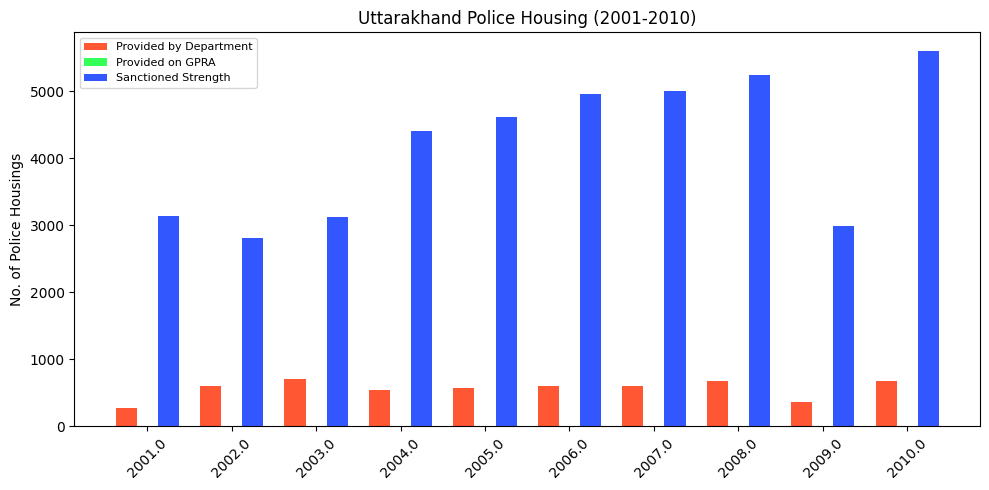

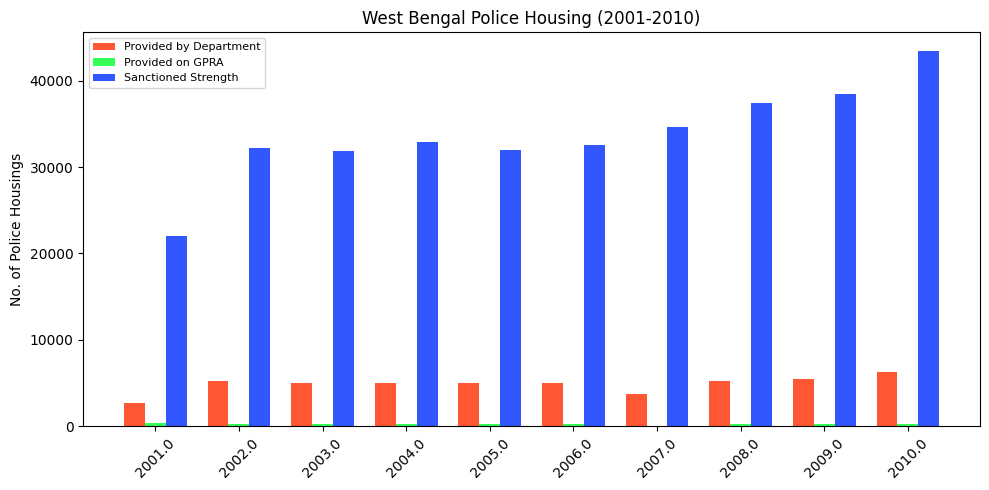

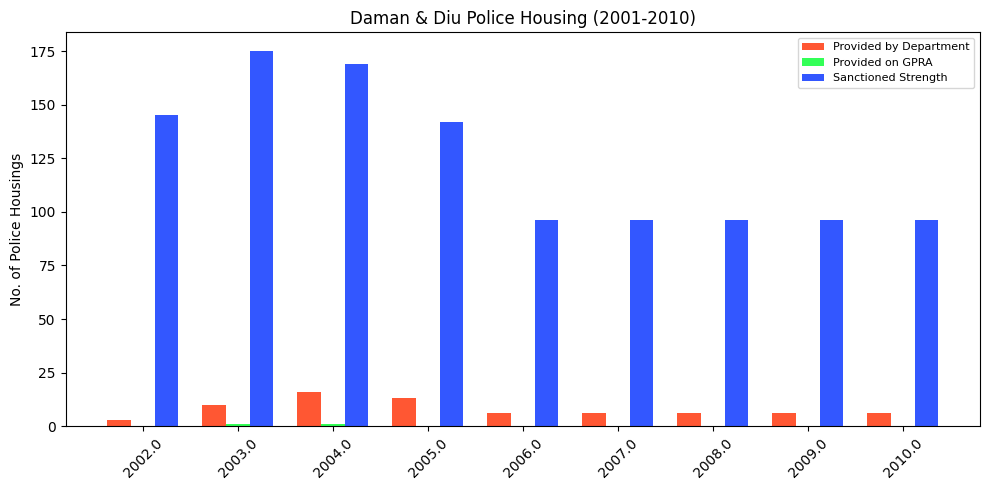

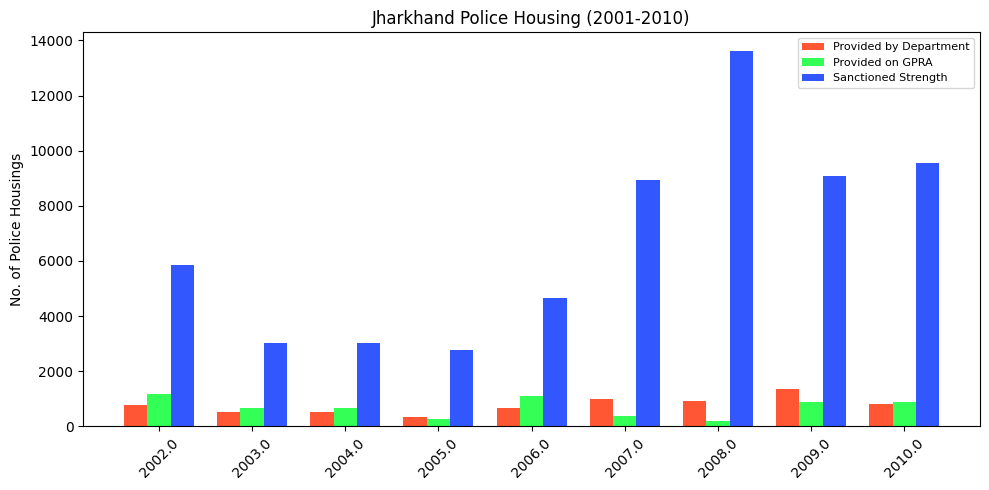

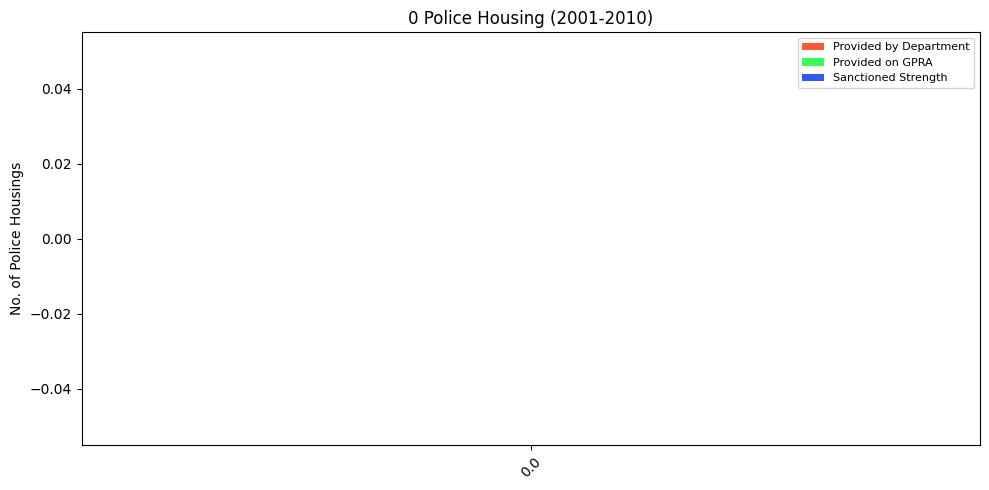

In [24]:
for i in areas:
    plot_details(i)

- <h3><b>2001 - 2010 Intensity of Police Housing [Sanctioned Strength] Statewise</b></h3>

C:\Users\Arkadeep\AppData\Local\Temp\ipykernel_1504\3200157434.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged['Frequency'] = merged['Frequency'].fillna(0).astype(int)


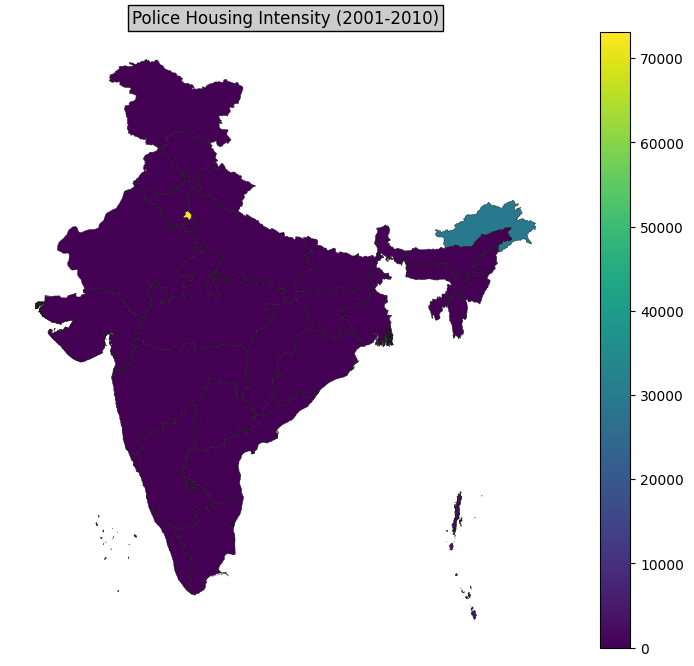

In [28]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create DataFrame
df = pd.DataFrame(zip(areas, housings3), columns=['Area_Name', 'Frequency'])

# Load map file
map_file = gpd.read_file(r"E:\project-gtp-main\.mapDependencies\Indian_States.shp")

# Merge data with map
merged = map_file.set_index('st_nm').join(df.set_index('Area_Name'))

# Manually add missing values
missing_areas = ['Andaman & Nicobar Island', 'Arunanchal Pradesh', 'Dadara & Nagar Havelli', 
                 'NCT of Delhi', 'Telangana']
values = [2950, 29534, 17, 73161, 0]

for area, value in zip(missing_areas, values):
    merged.at[area, 'Frequency'] = value

# Convert to integer
merged['Frequency'] = merged['Frequency'].fillna(0).astype(int)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))  # Smaller figure
ax.axis('off')
ax.set_title('Police Housing Intensity (2001-2010)', fontsize=12, bbox={'facecolor': '0.8', 'pad': 3})

merged.plot(column='Frequency', cmap='viridis', linewidth=0.3, ax=ax, edgecolor='0.1', legend=True)
plt.show()


<center>For further information or query mail us at <a href = "mailto: aroy02072000@gmail.com">aroy02072000@gmail.com</a></center>


<br><center>&copy; All rights reserved by Webskitters Academy</center>